In [175]:
import pandas as pnds
import numpy as np
from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import operator
from sklearn.impute import SimpleImputer

from sklearn.model_selection import KFold

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn import tree
import seaborn as sns

from IPython.display import Image

%matplotlib inline

In [176]:
# add the rows names
row_heading = ['age','sex','chest_pain','blood pressure','serum_cholestoral','fasting_blood_sugar',\
               'electrocardiographic','max_heart_rate','induced_angina','ST_depression','slope','vessels','thal','diagnosis']

# read csv file with Cleveland heart diseases data
#raw_heart1 = pnds.read_csv('F:\MachineLearning\DATASET_PROJ/processed.cleveland.data', names=row_heading)
raw_heart =pnds.read_csv('F:\MachineLearning\DATASET_PROJ/processed.cleveland.data', names=row_heading)
raw_heart1 =pnds.read_csv('F:\MachineLearning\DATASET_PROJ/processed.hungarian.data')
raw_heart2 =pnds.read_csv('F:\MachineLearning\DATASET_PROJ/processed.switzerland.data')
raw_heart.append(raw_heart1)
raw_heart.append(raw_heart2)
#raw_heart.append(raw_heart1, raw_heart2, raw_heart3)
#raw_heart = pnds.read_csv('F:\MachineLearning\DATASET_PROJ/processed.cleveland.data', names=row_heading)
print(raw_heart)

      age  sex  chest_pain blood pressure serum_cholestoral  \
0    63.0  1.0         1.0          145.0             233.0   
1    67.0  1.0         4.0          160.0             286.0   
2    67.0  1.0         4.0          120.0             229.0   
3    37.0  1.0         3.0          130.0             250.0   
4    41.0  0.0         2.0          130.0             204.0   
..    ...  ...         ...            ...               ...   
592  52.0  1.0         4.0            160               331   
593  54.0  0.0         3.0            130               294   
594  56.0  1.0         4.0            155               342   
595  58.0  0.0         2.0            180               393   
596  65.0  1.0         4.0            130               275   

    fasting_blood_sugar electrocardiographic max_heart_rate induced_angina  \
0                   1.0                  2.0          150.0            0.0   
1                   0.0                  2.0          108.0            1.0   
2        

In [177]:

index = raw_heart[(raw_heart['age'] >= 100)|(raw_heart['age'] <= 0)].index
raw_heart.drop(index, inplace=True)
raw_heart['age'].describe()

count    597.000000
mean      51.182580
std        9.074366
min       28.000000
25%       44.000000
50%       52.000000
75%       58.000000
max       77.000000
Name: age, dtype: float64

In [178]:
heart = raw_heart.replace('?', np.nan);

In [179]:
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
heart_done = imp.fit_transform(heart).tolist()
print("********************Completed with pre-processing*****************************")


********************Completed with pre-processing*****************************


In [180]:
print("**********************Start Feature Engineering****************************")

**********************Start Feature Engineering****************************


In [181]:
preprocessing.Normalizer(heart_done)
heart = pnds.DataFrame(heart_done,columns=row_heading)
heart[:1000]

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.000000,0.000000,6.00000,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.000000,3.000000,3.00000,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.000000,2.000000,7.00000,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.000000,0.000000,3.00000,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.000000,0.000000,3.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,52.0,1.0,4.0,160.0,331.0,0.0,0.0,94.0,1.0,2.5,1.675676,0.665563,4.81155,1.0
593,54.0,0.0,3.0,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.000000,0.665563,4.81155,1.0
594,56.0,1.0,4.0,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.000000,0.665563,4.81155,1.0
595,58.0,0.0,2.0,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.000000,0.665563,7.00000,1.0


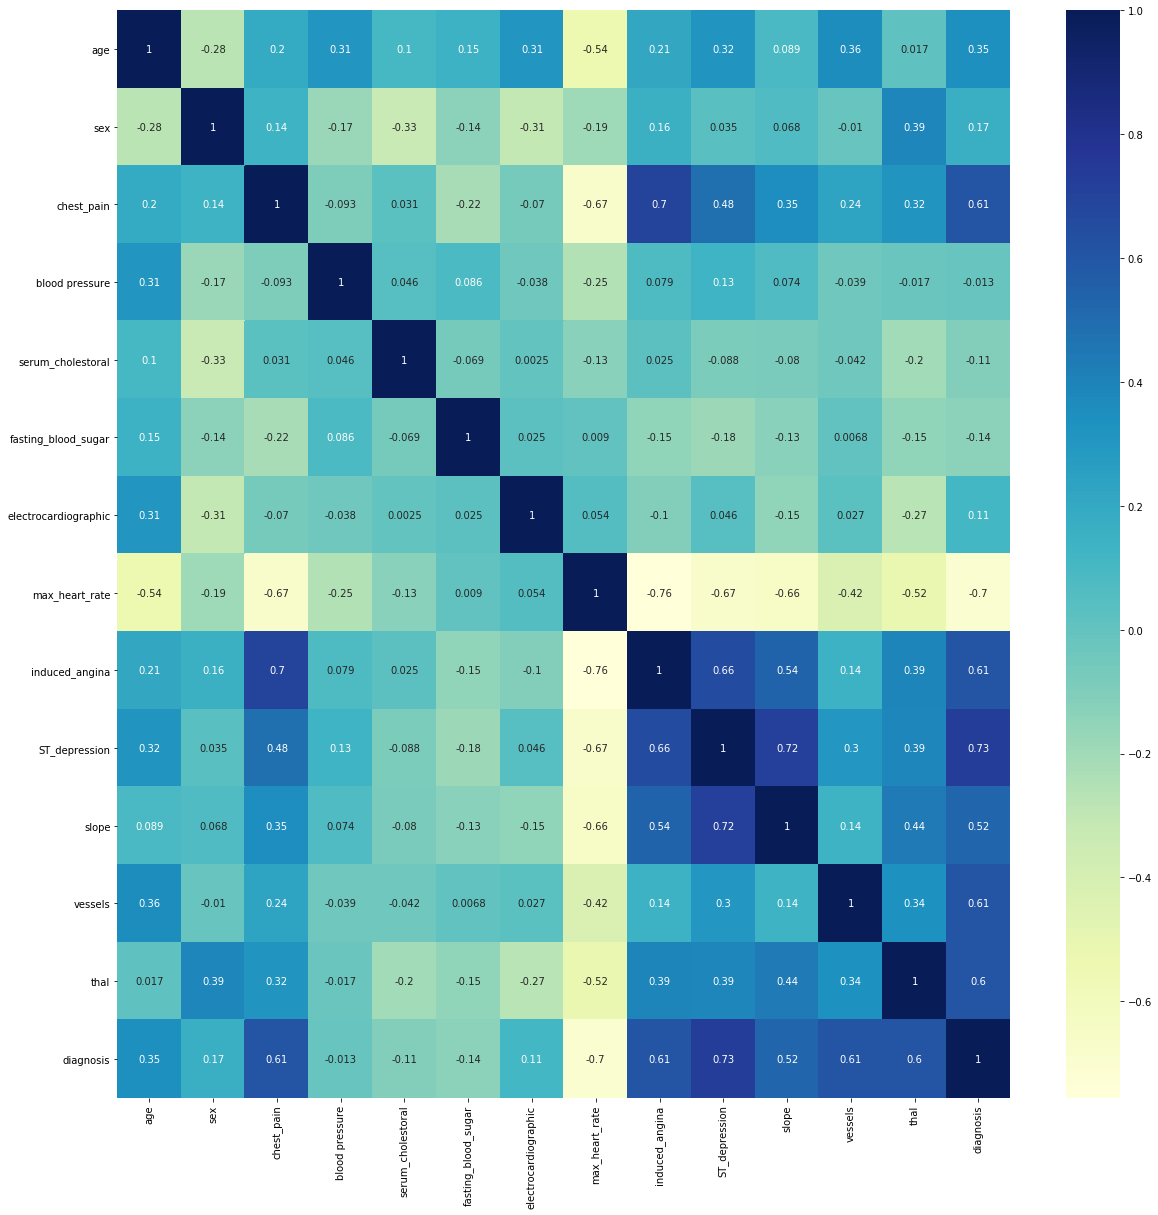

In [182]:


# heatmap plot
import seaborn as sns
import matplotlib.pyplot as plt
Var_Corr = heart.corr()
top_corr_features = Var_Corr.index
plt.figure(figsize=(20,20))
sns.heatmap(Var_Corr[top_corr_features].corr(), annot=True, cmap = "YlGnBu")


In [183]:
print("From the above heatmap, it can be determined that no columns are co-related so we will be using all the columns for analysis.")

print("*********************************END OF FEATURE ENGINEERING ****************************************")

From the above heatmap, it can be determined that no columns are co-related so we will be using all the columns for analysis.
*********************************END OF FEATURE ENGINEERING ****************************************


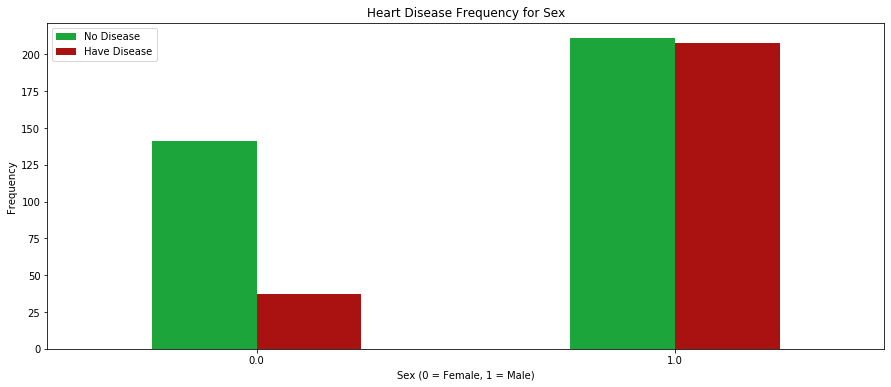

In [184]:
heart.loc[heart['diagnosis'] >=1, 'diagnosis'] = 1
pnds.crosstab(heart.sex,heart.diagnosis).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [185]:


y = heart.diagnosis.values
x_data = heart.drop(['diagnosis'], axis = 1)

In [186]:
X_train, X_test, Y_train, Y_test = train_test_split(x_data,y,test_size = 0.2,random_state=0)

X_train[:1000]


,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal
239,42.0,1.0,2.0,120.0,295.0,0.0,0.0,162.0,0.0,0.0,1.000000,0.000000,3.00000
490,62.0,1.0,2.0,140.0,271.0,0.0,0.0,152.0,0.0,1.0,1.000000,0.665563,4.81155
590,50.0,1.0,4.0,140.0,341.0,0.0,1.0,125.0,1.0,2.5,2.000000,0.665563,4.81155
181,56.0,0.0,4.0,134.0,409.0,0.0,2.0,150.0,1.0,1.9,2.000000,2.000000,7.00000
570,54.0,1.0,4.0,140.0,216.0,0.0,0.0,105.0,0.0,1.5,2.000000,0.665563,4.81155
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,39.0,0.0,3.0,138.0,220.0,0.0,0.0,152.0,0.0,0.0,2.000000,0.000000,3.00000
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.000000,0.000000,7.00000
359,42.0,1.0,3.0,120.0,228.0,0.0,0.0,152.0,1.0,1.5,2.000000,0.665563,4.81155
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.000000,0.665563,7.00000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
#from sklearn.model_selection import cross_val_score
#print (np.mean(cross_val_score(rf, X_train, Y_train, cv=10)))
Y_pred_rf = rf.predict(X_test)


In [ ]:
Y_pred_rf.shape

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

In [ ]:
print(rf.feature_importances_)
feat_importances = pnds.Series(rf.feature_importances_, index=x_data.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
#from sklearn.model_selection import cross_val_score
#print (np.mean(cross_val_score(rf, X_train, Y_train, cv=10)))